# Univelcity Virtual Internship - Obum Week 1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
enrolled_data = pd.read_csv('V-Internship/birthdays.csv')
enrolled_data

# Rename Unnamed: 0 to studentID column
enrolled_data = enrolled_data.rename(columns = {'Unnamed: 0':'studentID'})
enrolled_data

# Create a subset of original dataframe
subset_of_enrolled_data = enrolled_data[['studentID', 'GENDER']]


# Data Wrangling

## Q1. Applying Data Analysis and Visualization, glean out insights from both datasets with respect to the Gender of the applicants.

###  From the Enrolled file - Gender should have 2 unique objects (Male or Female)

In [5]:
enrolled_data.GENDER = enrolled_data.GENDER.replace(['male', 'female'], ['Male', 'Female'])

In [6]:
enrolled_data.GENDER.unique()

array(['Male', 'Female'], dtype=object)

In [25]:
# To get the number of enrolled applicants
no_of_enrolled_applicants = enrolled_data.GENDER.count()
no_of_enrolled_applicants

1766

In [141]:
# To get the number of enrolled males
bool_df_of_enrolled_males = enrolled_data.GENDER == "Male"
no_of_enrolled_males =  enrolled_data[bool_df_of_enrolled_males].GENDER.count()
no_of_enrolled_males

1623

In [22]:
# To get the number of enrolled females
bool_df_of_enrolled_females = enrolled_data.GENDER == "Female"
no_of_enrolled_females = enrolled_data[bool_df_of_enrolled_females].GENDER.count()
no_of_enrolled_females

143

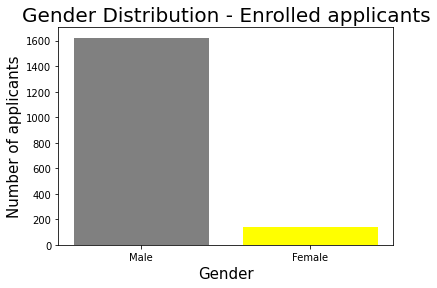

In [167]:
New_Colors = ['grey','yellow']
plt.bar(['Male', 'Female'],[no_of_enrolled_males, no_of_enrolled_females], color=New_Colors)
plt.title('Gender Distribution - Enrolled applicants', fontsize=20)
plt.ylabel('Number of applicants', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.show()

# Registered dataSet

In [6]:
register_data = pd.read_csv('V-Internship/registered applicants.csv')
register_data

# Rename Unnamed: 0 to studentID column
register_data = register_data.rename(columns = {'Unnamed: 0':'studentID'})
register_data

# Create a subset from the registered dataset - for only StudentsID and Gender
subset_of_registered_data = register_data[['studentID', 'GENDER']]

In [85]:
# to Know the unique values in the gender column
register_data.GENDER.unique()

array(['Male', 'Female', nan, 'male', 'female'], dtype=object)

In [86]:
register_data.GENDER = register_data.GENDER.replace(['male', 'female'], ['Male', 'Female'])

In [87]:
register_data.GENDER.unique()

array(['Male', 'Female', nan], dtype=object)

In [96]:
# No of registered Students
register_data_is_null =  register_data[register_data['GENDER'].isnull()].count()
register_data_is_null['studentID']
no_of_registered_applicants = register_data.studentID.count()
no_of_registered_applicants

3676

In [139]:
# No of registered Students without a Gender
register_data_is_null =  register_data[register_data['GENDER'].isnull()][['studentID', 'GENDER']]
register_data_is_null.studentID.count()

56

In [119]:
# Note no registered student with Gender blank (NaN) was enrolled
null_gender_in_enrolled = pd.merge(register_data_is_null, subset_of_enrolled_data).studentID.count()
null_gender_in_enrolled

0

In [121]:
# No of registered females
no_of_registered_female = register_data[register_data.GENDER == 'Female']['GENDER'].count()
no_of_registered_female

717

In [122]:
# No of registered males
no_of_registered_male = register_data[register_data.GENDER == 'Male']['GENDER'].count()
no_of_registered_male

2903

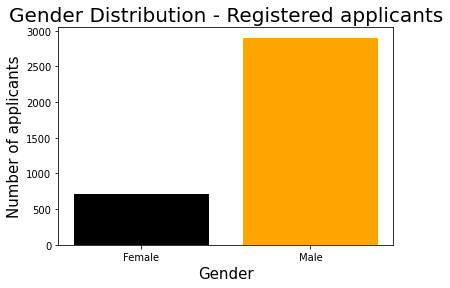

In [166]:
New_Colors = ['black','orange']
plt.bar([ 'Female','Male'],[no_of_registered_female, no_of_registered_male], color=New_Colors)
plt.title('Gender Distribution - Registered applicants', fontsize=20)
plt.ylabel('Number of applicants', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.show()

In [9]:
# Get the table of applicants that are both on the registered list and enrolled list
registered_and_enrolled_applicants = pd.merge(subset_of_registered_data, subset_of_enrolled_data)

In [60]:
No_of_registered_and_enrolled_applicants = registered_and_enrolled_applicants.GENDER.count()
No_of_registered_and_enrolled_applicants

1766

In [102]:
no_of_registered_and_enrolled_females = registered_and_enrolled_applicants[registered_and_enrolled_applicants.GENDER == 'Female']['GENDER'].count()
no_of_registered_and_enrolled_females

143

In [103]:
no_of_registered_and_enrolled_male = registered_and_enrolled_applicants[registered_and_enrolled_applicants.GENDER == 'Male']['GENDER'].count()
no_of_registered_and_enrolled_male

1623

# Q2. What is the probability that a randomly selected registered female will be enrolled in the program?

In [128]:
Prob_of_selecting_an_enrolled_female_from_registered_female = no_of_registered_and_enrolled_females/no_of_registered_female
Prob_of_selecting_an_enrolled_female_from_registered_female.round(2)

0.2

# Q3. What is the probability that a randomly selected registered male will be enrolled in the program?

In [129]:
Prob_of_selecting_an_enrolled_female_from_registered_male = no_of_registered_and_enrolled_male/no_of_registered_male
Prob_of_selecting_an_enrolled_female_from_registered_male.round(2)

0.56

# Q4. What is the probability that a registered applicant will eventually enroll in the program?

In [130]:
Prob_that_applicants_enroll = no_of_enrolled_applicants/no_of_registered_applicants
Prob_that_applicants_enroll.round(2)

0.48